# **Lowercasing Turkish with Python**

Turkish alphabet consists of 29 letters. Compared to English, there are 7 additional letters Ç, Ş, Ğ, I, İ, Ö, Ü and the letters Q, W, and X are not a part of the alphabet.

For further reading on the Turkish alphabet please refer to this resource by Northwestern: https://mena-languages.northwestern.edu/language-learning/languages-with-different-scripts/turkish-alphabet.html

While the move from ASCII to Unicode allowed for all of the 29 letters in Turkish to be processed by computers, there are still special cases that researchers working with Turkish must keep in mind. One of them is the mapping of upper and lowercase **I ı** and **İ i** in Python's built-in **.lower() function.**

Because Python is created with the English language in mind, the built-in .lower() function maps I to i, following the rules of the English alphabet. However in Turkish the lowercase version of I is ı and the uppercase version of i is İ. This means that when researchers use .lower() for a Turkish text, I and İ gets mixed up.

Here is an example with a word that might be familiar to many. Istanbul, the largest city in Turkey, is spelled as *İstanbul*. Let's see if we get the correct output when we lowercase it.

In [1]:
print("İstanbul".lower())  # Expecting "istanbul"

i̇stanbul


Well, we got *i̇stanbul* instead

The following table illustrates this mapping.

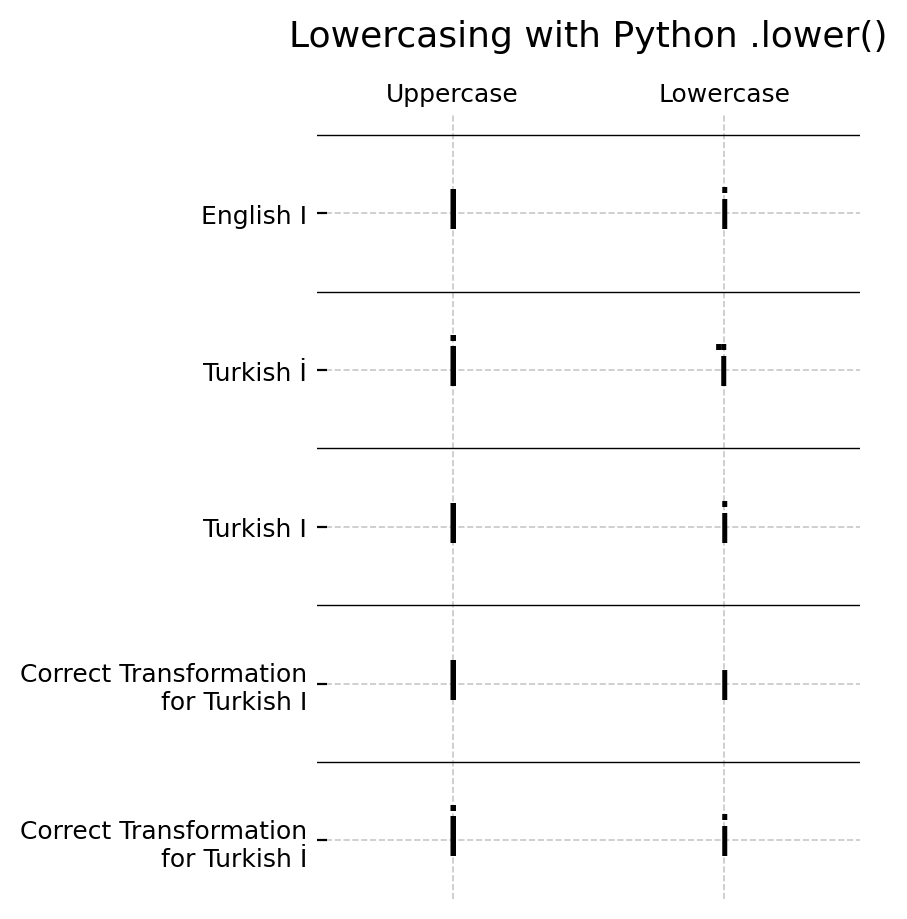

## Example Sentences

In [2]:
# Two sentences in Turkish that begin with I/İ

sentence_one = "İyi akşamlar!" #Good Night!
sentence_two = "Işığı kapatabilir misin?" #Can you turn off the light?

# What I expect after lowercasing them:

expectation_one = "iyi akşamlar!"
expectation_two = "ışığı kapatabilir misin?"

In [3]:
# What Python does:

print(sentence_one.lower())

i̇yi akşamlar!


Output: i̇yi akşamlar!

In [4]:
sentence_one.lower() == expectation_one 

False

In [5]:
print(sentence_two.lower())

işığı kapatabilir misin?


Output: işığı kapatabilir misin?

In [6]:
sentence_two.lower() == expectation_two

False

As you can see above, **Işığı** turned into **işığı** and **İyi** to **i̇yi**. However, I had expected them to be transformed to **ışığı** and **iyi**, respectively.

In [7]:
# My solution is to use a custom function that treats these letters separately
# and then calls .lower()

def turkish_lower(text):
    text = text.replace('I', 'ı').replace('İ', 'i')
    return text.lower()

In [8]:
# Improved!

print(turkish_lower(sentence_one))

# Output: iyi akşamlar!

iyi akşamlar!


In [9]:
turkish_lower(sentence_one) == expectation_one

True

In [10]:
print(turkish_lower(sentence_two))

# Output: ışığı kapatabilir misin?

ışığı kapatabilir misin?


In [11]:
turkish_lower(sentence_two) == expectation_two

True

In [12]:
# Rest of the letters work just fine because Python works with Unicode
# Here is a test with letters in Turkish that are not in English

letters = "ÇĞÖŞÜ"
print("Built-in:", letters.lower(), "Custom:", turkish_lower(letters))

# Output: çğöşü for both

Built-in: çğöşü Custom: çğöşü


Technology has never been neutral or language agnostic, especially in the domains of natural language processing. Tools are overwhelmingly built for and through (American) English as the *natural* language. At a time when Large Language Models increasingly play an integral role in our everyday lives on the Internet, English-centricism becomes ever more consequential. 

Even for a relatively high-resourced language like Turkish, this poses challenges both in tool development and in analysis. 

According to [Ethnologue 2022](https://www.ethnologue.com/25/language/tur/) Turkish is used by over 88 million people worldwide. It is also the 17th most spoken language, counting the first and second language speakers [together](https://www.ethnologue.com/25/guides/ethnologue200/). Despite these qualities, lowercasing Turkish with Python remains a challenge; a special case that needs to be addressed separately. Luckily, engineering a solution takes only a few lines of code, which means that this is not really a technical problem. The persistance of this issue is related to limited awareness and representation of non-English languages in computational linguistics research.  

Ultimately, the case of lowercasing Turkish with Python reveals that English-centric assumptions about languages and computers are embedded even in the simplest of the functions.

